In [1]:
# Import libraries. You may or may not use all of these.
#!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tqdm.keras import TqdmCallback;

#import tensorflow_docs as tfdocs
#import tensorflow_docs.plots
#import tensorflow_docs.modeling

c:\ProgramData\anaconda3\envs\tensorflow\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv -nv

dataset = pd.read_csv('insurance.csv')
os.remove('insurance.csv')

dataset.head()

2024-01-05 23:44:14 URL:https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv [50264/50264] -> "insurance.csv" [1]


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
# Get categorical columns indexes
cat_columns = dataset.select_dtypes(['object']).columns

# Factorize (convert to numerical) all categorical columns
dataset[cat_columns] = dataset[cat_columns].apply(lambda x: pd.factorize(x)[0])

dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,0,0,16884.92
1,18,1,33.8,1,1,1,1725.55
2,28,1,33.0,3,1,1,4449.46
3,33,1,22.7,0,1,2,21984.47
4,32,1,28.9,0,1,2,3866.86


In [4]:
split = 0.8

train_dataset = dataset.sample(frac=split)
test_dataset = dataset.drop(train_dataset.index)

print(f'{split * 100}% split: {train_dataset.size} training samples and {test_dataset.size} validation samples.')

80.0% split: 7490 training samples and 1876 validation samples.


In [5]:
train_labels = train_dataset .pop('expenses')
test_labels = test_dataset.pop('expenses')

In [6]:
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(train_dataset)

In [7]:
model = tf.keras.models.Sequential([
  normalizer,
  tf.keras.layers.Dense(6),
  tf.keras.layers.Dense(1)
])

model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.008), loss='mean_absolute_error', metrics=['mae', 'mse'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 6)                 13        
 on)                                                             
                                                                 
 dense (Dense)               (None, 6)                 42        
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 62 (252.00 Byte)
Trainable params: 49 (196.00 Byte)
Non-trainable params: 13 (56.00 Byte)
_________________________________________________________________


In [8]:
EPOCHS = 600
history = model.fit(
    x=train_dataset,
    y=train_labels,
    validation_data=(test_dataset, test_labels),
    epochs=EPOCHS,
    verbose=0,
    callbacks=[TqdmCallback(verbose=0)],
)

100%|██████████| 600/600 [00:26<00:00, 22.43epoch/s, loss=3.51e+3, mae=3.51e+3, mse=5.06e+7, val_loss=3.01e+3, val_mae=3.01e+3, val_mse=3.92e+7]


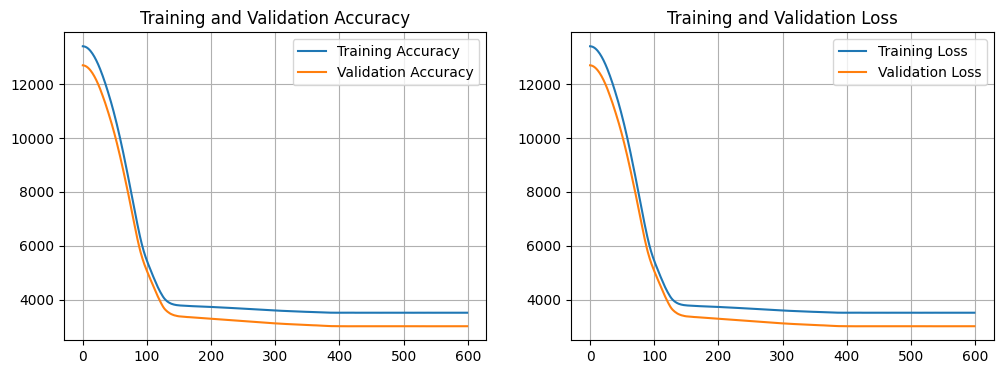

In [9]:
# Plotting the training and validation mean absolute error and loss.
mae = history.history["mae"]
val_mae = history.history["val_mae"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, mae, label="Training Accuracy")
plt.plot(epochs_range, val_mae, label="Validation Accuracy")
plt.grid()
plt.legend(loc="upper right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.grid()
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()

9/9 - 0s - loss: 3009.6255 - mae: 3009.6255 - mse: 39223892.0000 - 31ms/epoch - 3ms/step
Testing set Mean Abs Error: 3009.63 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 626us/step


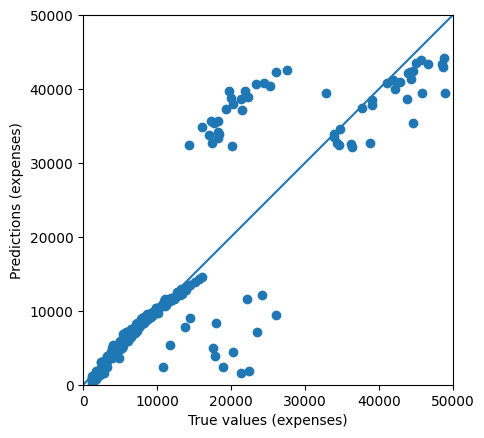

In [10]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
